<a href="https://colab.research.google.com/github/nu-jliu/MECH_ENG_314/blob/main/Homeworks/HW4/Homework4_Allen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME314 Homework 4

###Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. **Your homework will be graded IFF you submit a single PDF, .mp4 videos of animations when requested and a link to a Google colab file that meet all the requirements outlined below.**

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) for handwritten or markdown questions and include simplified code outputs (e.g. .simplify()) for python questions.

- Enable Google Colab permission for viewing
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change"
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Juputer Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

In [ ]:
##############################################################################################
# If you're using Google Colab, uncomment this section by selecting the whole section and press
# ctrl+'/' on your and keyboard. Run it before you start programming, this will enable the nice
# LaTeX "display()" function for you. If you're using the local Jupyter environment, leave it alone
##############################################################################################
import sympy as sym
import numpy as np

from IPython.display import display, Markdown

def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

In [ ]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/dynhoop2.png' width=500' height='350'></table>"))

## Problem 1 (20pts)

Take the bead on a hoop example shown in the image above, model it using a torque input $\tau$ (about the vertical $z$ axis) instead of a velocity input $\omega$. You will need to add a configuration variable $\psi$ that is the rotation about the $z$ axis, so that the system configuration vector is $q=[\theta,\psi]$. Use Python's SymPy package to compute the equations of motion for this system in terms of $\theta, \psi$.

*Hint 1: Note that this should be a Lagrangian system with an external force.*

**Turn in: A copy of code used to symbolically solve for the equations of motion, also include the code outputs, which should be the equations of motion.**

In [ ]:
t, R, m, g = sym.symbols(r't, R, m, g')
theta = sym.Function(r'\theta')(t)
psi   = sym.Function(r'\psi')(t)
tau   = sym.Function(r'\tau')(t)

thetadot = theta.diff(t)
psidot   = psi.diff(t)



q    = sym.Matrix([theta, psi])
qdot = q.diff(t)
display(Markdown(r'**Configuration $\vec{q}$ is**'))
display(q)

v1 = R*thetadot
v2 = R*sym.sin(theta)*psidot

KE = 1/2*m*(v1**2 + v2**2)
display(Markdown(r'**Kinetic Energy term $KE_{sys}$ is**'))
display(sym.Eq(sym.symbols(r'KE_{sys}'), KE))

V = m*g*(-R*sym.cos(theta))
display(Markdown(r'**Potential Energy term $V_{sys}$ is**'))
display(sym.Eq(sym.symbols(r'V_{sys}'), V))

L = sym.simplify(KE - V)

display(Markdown(r'**The lagrangian of the system $L_{sys}$ is**'))
display(sym.Eq(sym.symbols(r'L_{sys}'), L))

L_mat = sym.Matrix([L])
dLdq  = sym.simplify(L_mat.jacobian(q).T)
display(Markdown(r'**The derivative of $\frac{\partial L}{\partial \vec{q}}$ is:**'))
display(dLdq)

dLdqdot = sym.simplify(L_mat.jacobian(qdot).T)
display(Markdown(r'**The derivative of $\frac{\partial L}{\partial \dot{\vec{q}}}$ is:**'))
display(dLdqdot)

ddtdLdqdot = sym.simplify(dLdqdot.diff(t))
display(Markdown(r'**The derivative of $\frac{d}{dt} \left ( \frac{\partial L}{\partial \dot{\vec{q}}} \right )$ is:**'))
display(ddtdLdqdot)
EL = sym.simplify(ddtdLdqdot - dLdq)
# display(EL)
F_vec = sym.Matrix([0, tau])

qddot = qdot.diff(t)

display(Markdown(r'**Euler Langrange Equation of the System is:**'))
EL_eqn = sym.Eq(EL, F_vec)
display(EL_eqn)

sols = sym.solve(EL_eqn, qddot, dict=True)

display(Markdown(r'**The symbolic solution for $\ddot{\theta}$ and $\ddot{\psi}$ is:**'))
for sol in sols:
  for v in qddot:
    display(sym.Eq(v, sym.simplify(sol[v])))

**Configuration $\vec{q}$ is**

⎡\theta(t)⎤
⎢         ⎥
⎣ \psi(t) ⎦

**Kinetic Energy term $KE_{sys}$ is**

                 ⎛                                2                     2⎞
                 ⎜ 2    2            ⎛d          ⎞     2 ⎛d            ⎞ ⎟
KE_{sys} = 0.5⋅m⋅⎜R ⋅sin (\theta(t))⋅⎜──(\psi(t))⎟  + R ⋅⎜──(\theta(t))⎟ ⎟
                 ⎝                   ⎝dt         ⎠       ⎝dt           ⎠ ⎠

**Potential Energy term $V_{sys}$ is**

V_{sys} = -R⋅g⋅m⋅cos(\theta(t))

**The lagrangian of the system $L_{sys}$ is**

              ⎛      ⎛                             2                  2⎞      
              ⎜      ⎜   2            ⎛d          ⎞    ⎛d            ⎞ ⎟      
L_{sys} = R⋅m⋅⎜0.5⋅R⋅⎜sin (\theta(t))⋅⎜──(\psi(t))⎟  + ⎜──(\theta(t))⎟ ⎟ + g⋅c
              ⎝      ⎝                ⎝dt         ⎠    ⎝dt           ⎠ ⎠      

             ⎞
             ⎟
os(\theta(t))⎟
             ⎠

**The derivative of $\frac{\partial L}{\partial \vec{q}}$ is:**

⎡    ⎛                                  2    ⎞               ⎤
⎢    ⎜                     ⎛d          ⎞     ⎟               ⎥
⎢R⋅m⋅⎜1.0⋅R⋅cos(\theta(t))⋅⎜──(\psi(t))⎟  - g⎟⋅sin(\theta(t))⎥
⎢    ⎝                     ⎝dt         ⎠     ⎠               ⎥
⎢                                                            ⎥
⎣                             0                              ⎦

**The derivative of $\frac{\partial L}{\partial \dot{\vec{q}}}$ is:**

⎡            2   d                   ⎤
⎢       1.0⋅R ⋅m⋅──(\theta(t))       ⎥
⎢                dt                  ⎥
⎢                                    ⎥
⎢     2      2            d          ⎥
⎢1.0⋅R ⋅m⋅sin (\theta(t))⋅──(\psi(t))⎥
⎣                         dt         ⎦

**The derivative of $\frac{d}{dt} \left ( \frac{\partial L}{\partial \dot{\vec{q}}} \right )$ is:**

⎡                                                     2                       
⎢                                               2    d                        
⎢                                          1.0⋅R ⋅m⋅───(\theta(t))            
⎢                                                     2                       
⎢                                                   dt                        
⎢                                                                             
⎢     ⎛                                                                       
⎢ 2   ⎜                     d           d                                     
⎢R ⋅m⋅⎜1.0⋅sin(2⋅\theta(t))⋅──(\psi(t))⋅──(\theta(t)) - 0.5⋅cos(2⋅\theta(t))⋅─
⎢     ⎜                     dt          dt                                    
⎣     ⎝                                                                      d

                               ⎤
                               ⎥
                               ⎥
                               

**Euler Langrange Equation of the System is:**

⎡               ⎛        2              ⎛                                  2  
⎢               ⎜       d               ⎜                     ⎛d          ⎞   
⎢           R⋅m⋅⎜1.0⋅R⋅───(\theta(t)) - ⎜1.0⋅R⋅cos(\theta(t))⋅⎜──(\psi(t))⎟  -
⎢               ⎜        2              ⎝                     ⎝dt         ⎠   
⎢               ⎝      dt                                                     
⎢                                                                             
⎢     ⎛                                                                       
⎢ 2   ⎜                     d           d                                     
⎢R ⋅m⋅⎜1.0⋅sin(2⋅\theta(t))⋅──(\psi(t))⋅──(\theta(t)) - 0.5⋅cos(2⋅\theta(t))⋅─
⎢     ⎜                     dt          dt                                    
⎣     ⎝                                                                      d

  ⎞               ⎞            ⎤            
  ⎟               ⎟            ⎥            
 g⎟⋅sin(\theta(t))⎟            ⎥        

**The symbolic solution for $\ddot{\theta}$ and $\ddot{\psi}$ is:**

                 ⎛                              2    ⎞               
                 ⎜                 ⎛d          ⎞     ⎟               
  2              ⎜R⋅cos(\theta(t))⋅⎜──(\psi(t))⎟  - g⎟⋅sin(\theta(t))
 d               ⎝                 ⎝dt         ⎠     ⎠               
───(\theta(t)) = ────────────────────────────────────────────────────
  2                                       R                          
dt                                                                   

                   ⎛ 2                      d           d                     
  2            2.0⋅⎜R ⋅m⋅sin(2.0⋅\theta(t))⋅──(\psi(t))⋅──(\theta(t)) - \tau(t
 d                 ⎝                        dt          dt                    
───(\psi(t)) = ───────────────────────────────────────────────────────────────
  2                               2                                           
dt                               R ⋅m⋅(cos(2.0⋅\theta(t)) - 1)                

 ⎞
)⎟
 ⎠
──
  
  

## Problem 2 (30pts)

Consider a point mass in 3D space under the forces of gravity and a radial spring from the origin. The system's Lagrangian is:
$$
L=\frac{1}{2} m (\dot{x}^2+\dot{y}^2+\dot{z}^2)- \frac{1}{2} k (x^2+y^2+z^2)-mgz
$$
Consider the following rotation matrices, defining rotations about the $z$, $y$, and $x$ axes respectively:
$$
R_\theta =\begin{bmatrix}\cos \theta & -\sin \theta & 0 \\ \sin \theta &
    \cos \theta& 0 \\ 0 & 0 & 1\end{bmatrix},
    \ \
R_\psi = \begin{bmatrix}\cos \psi & 0 & \sin \psi \\ 0 & 1 & 0 \\
    -\sin \psi & 0 & \cos \psi \end{bmatrix}, \ \
R_\phi = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos \phi & -\sin \phi \\
    0 & \sin \phi & \cos \phi \end{bmatrix}
$$

and answer the following three questions:

1. Which, if any, of the transformations $q_{\theta}=R_{\theta}q$, $q_{\psi}=R_{\psi}q$, or $q_{\phi}=R_{\phi}q$ keeps the Lagrangian fixed (invariant)? Is this invariance global or local?

2. Use small angle approximations to linearize your transformation(s) from the first question. The resulting new transformation(s) should have the form $q_{\epsilon}=q+\epsilon G(q)$. Compute the difference in the Lagrangian $L(q_\epsilon, \dot{q}_\epsilon) - L(q,\dot{q})$ through this/these transformation(s).

3. Apply Noether's theorem to determine a conserved quantity. What does this quantity represent physically?  Is there any rationale behind its conservation?

You can solve this problem by hand or use Python's SymPy to do the symbolic computation for you.

*Hint 1: For question (1), try to imagine how this system looks. Even though the $x$, $y$, and $z$ axes seem to have the same influence on the system, rotation around some axes will influence the Lagrangian more than others will.*

*Hint 2: Global invariance here means for any magnitude of rotation the Lagrangian will remain fixed.*

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. You can also use $\LaTeX$. If you use SymPy, then you just need to include a copy of code and the code outputs, with notes that explain why the code outputs can answer the questions.**

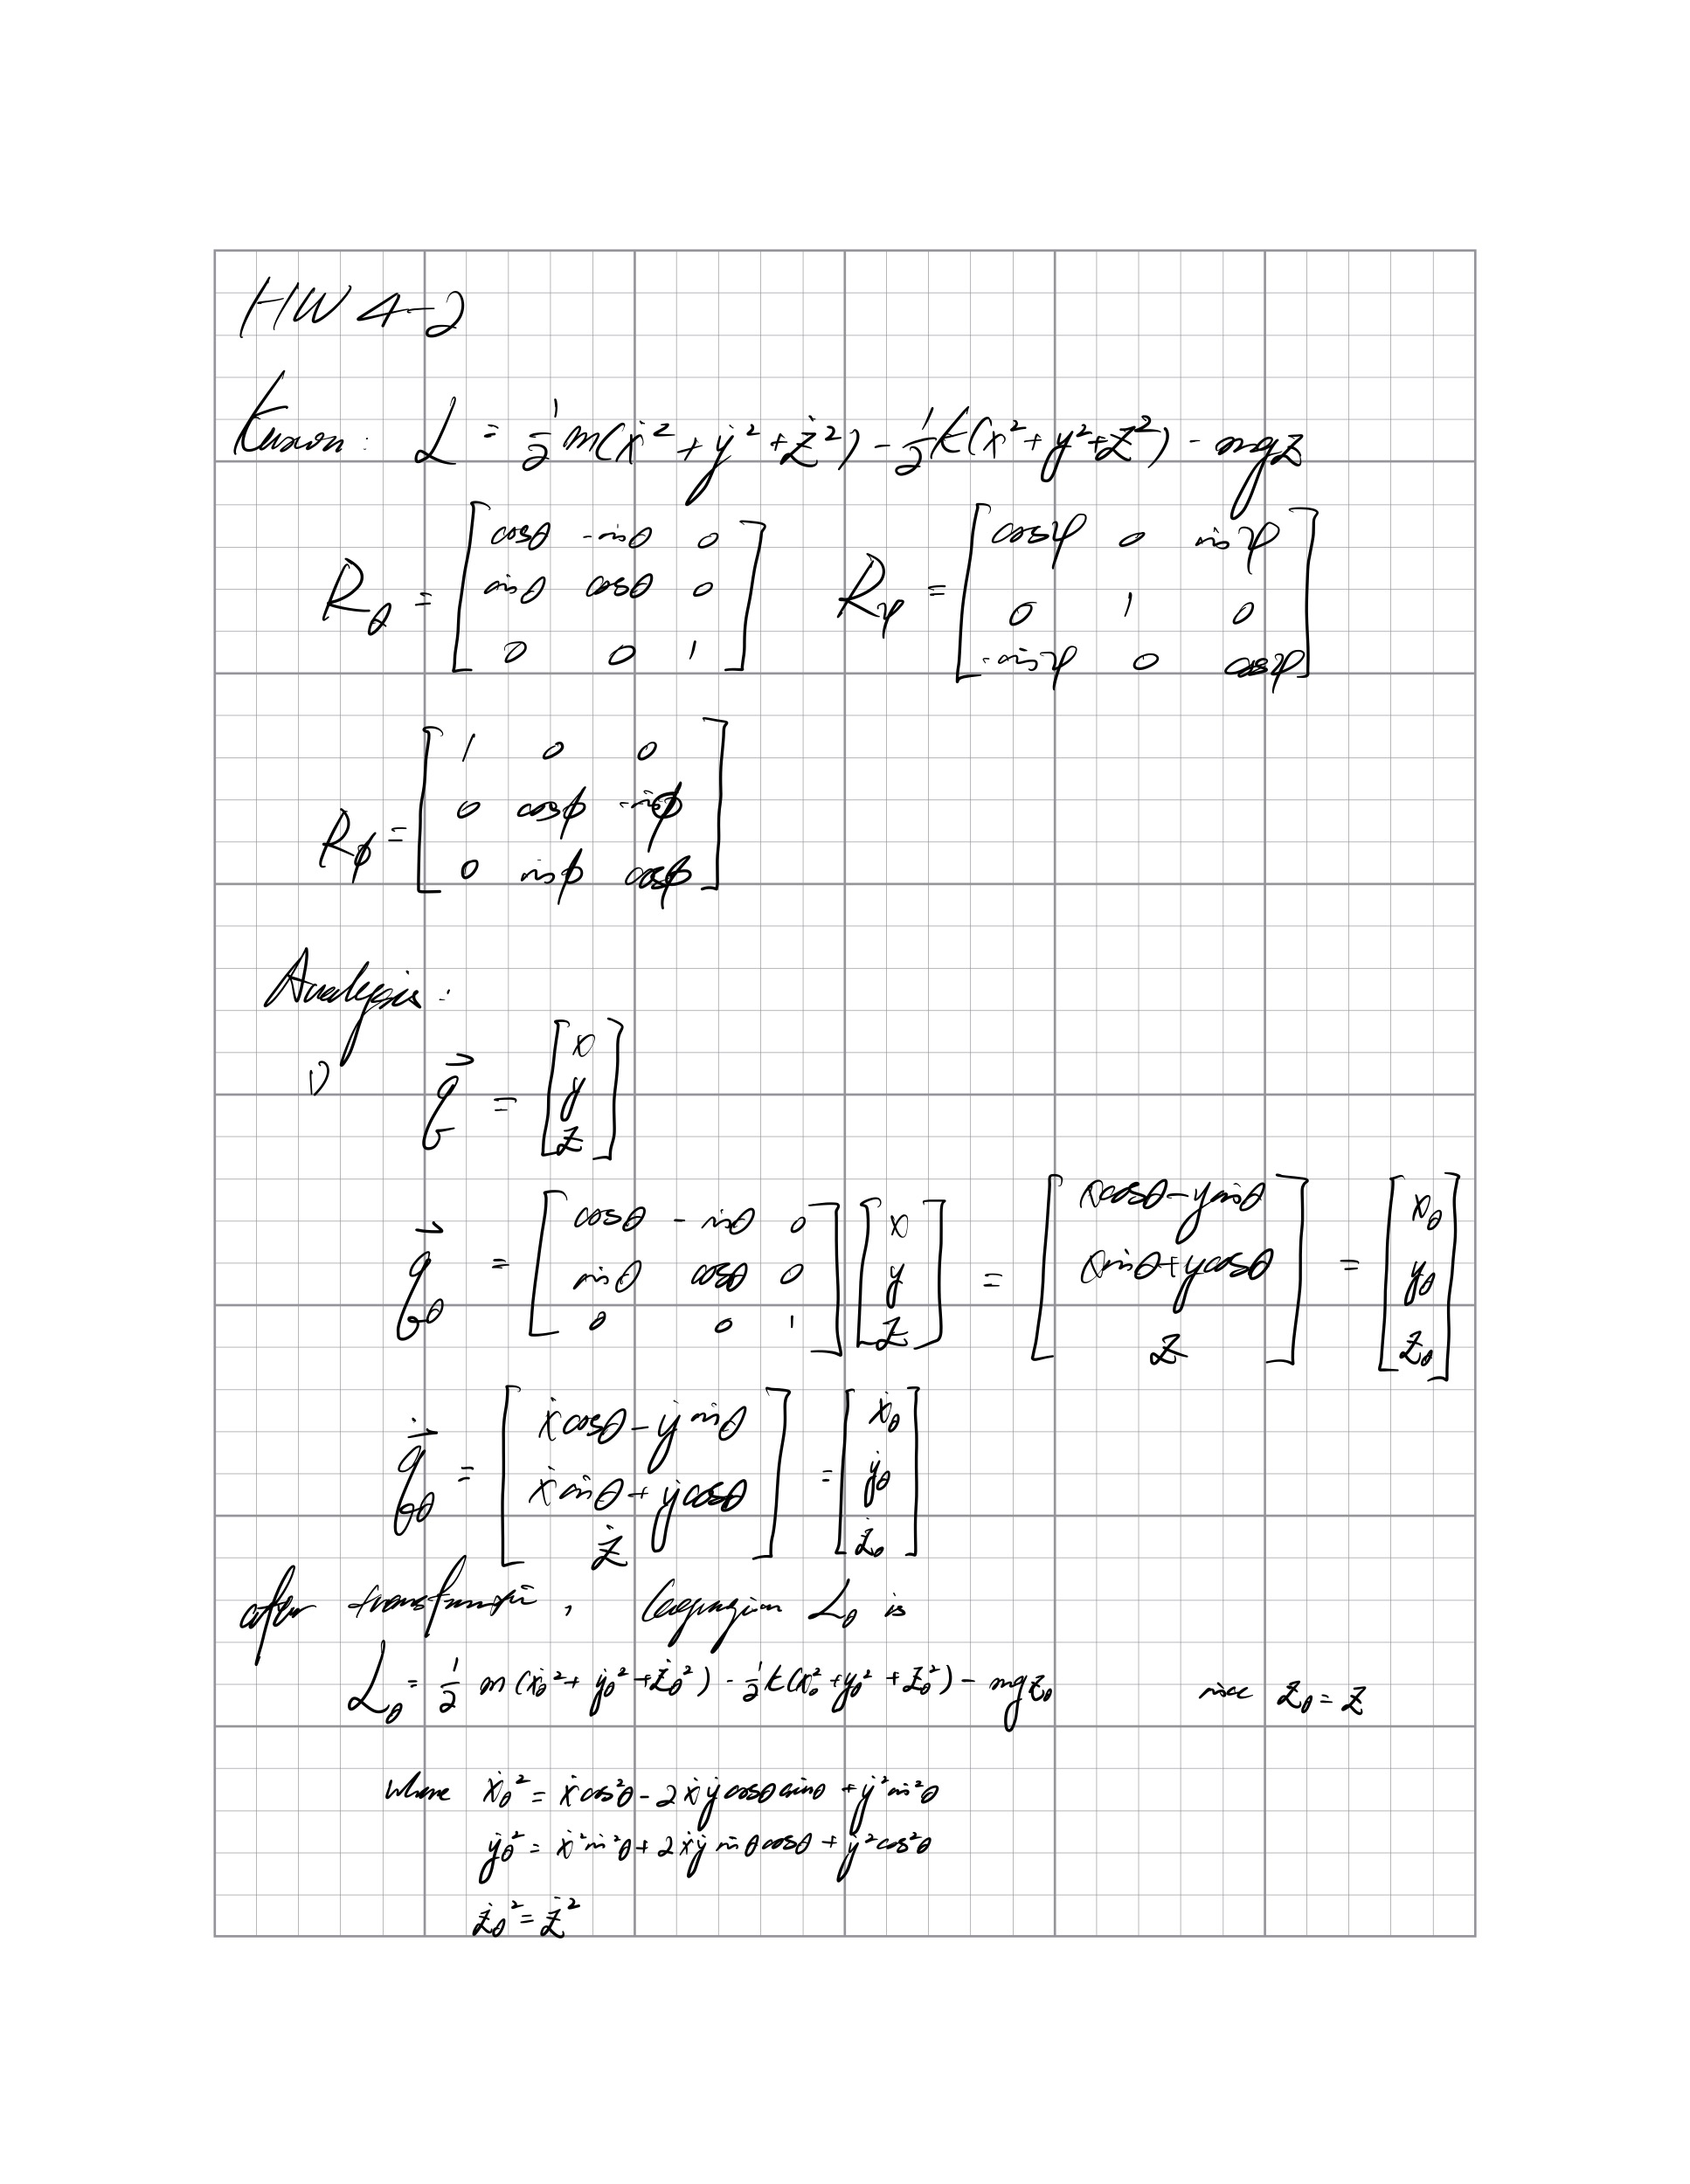

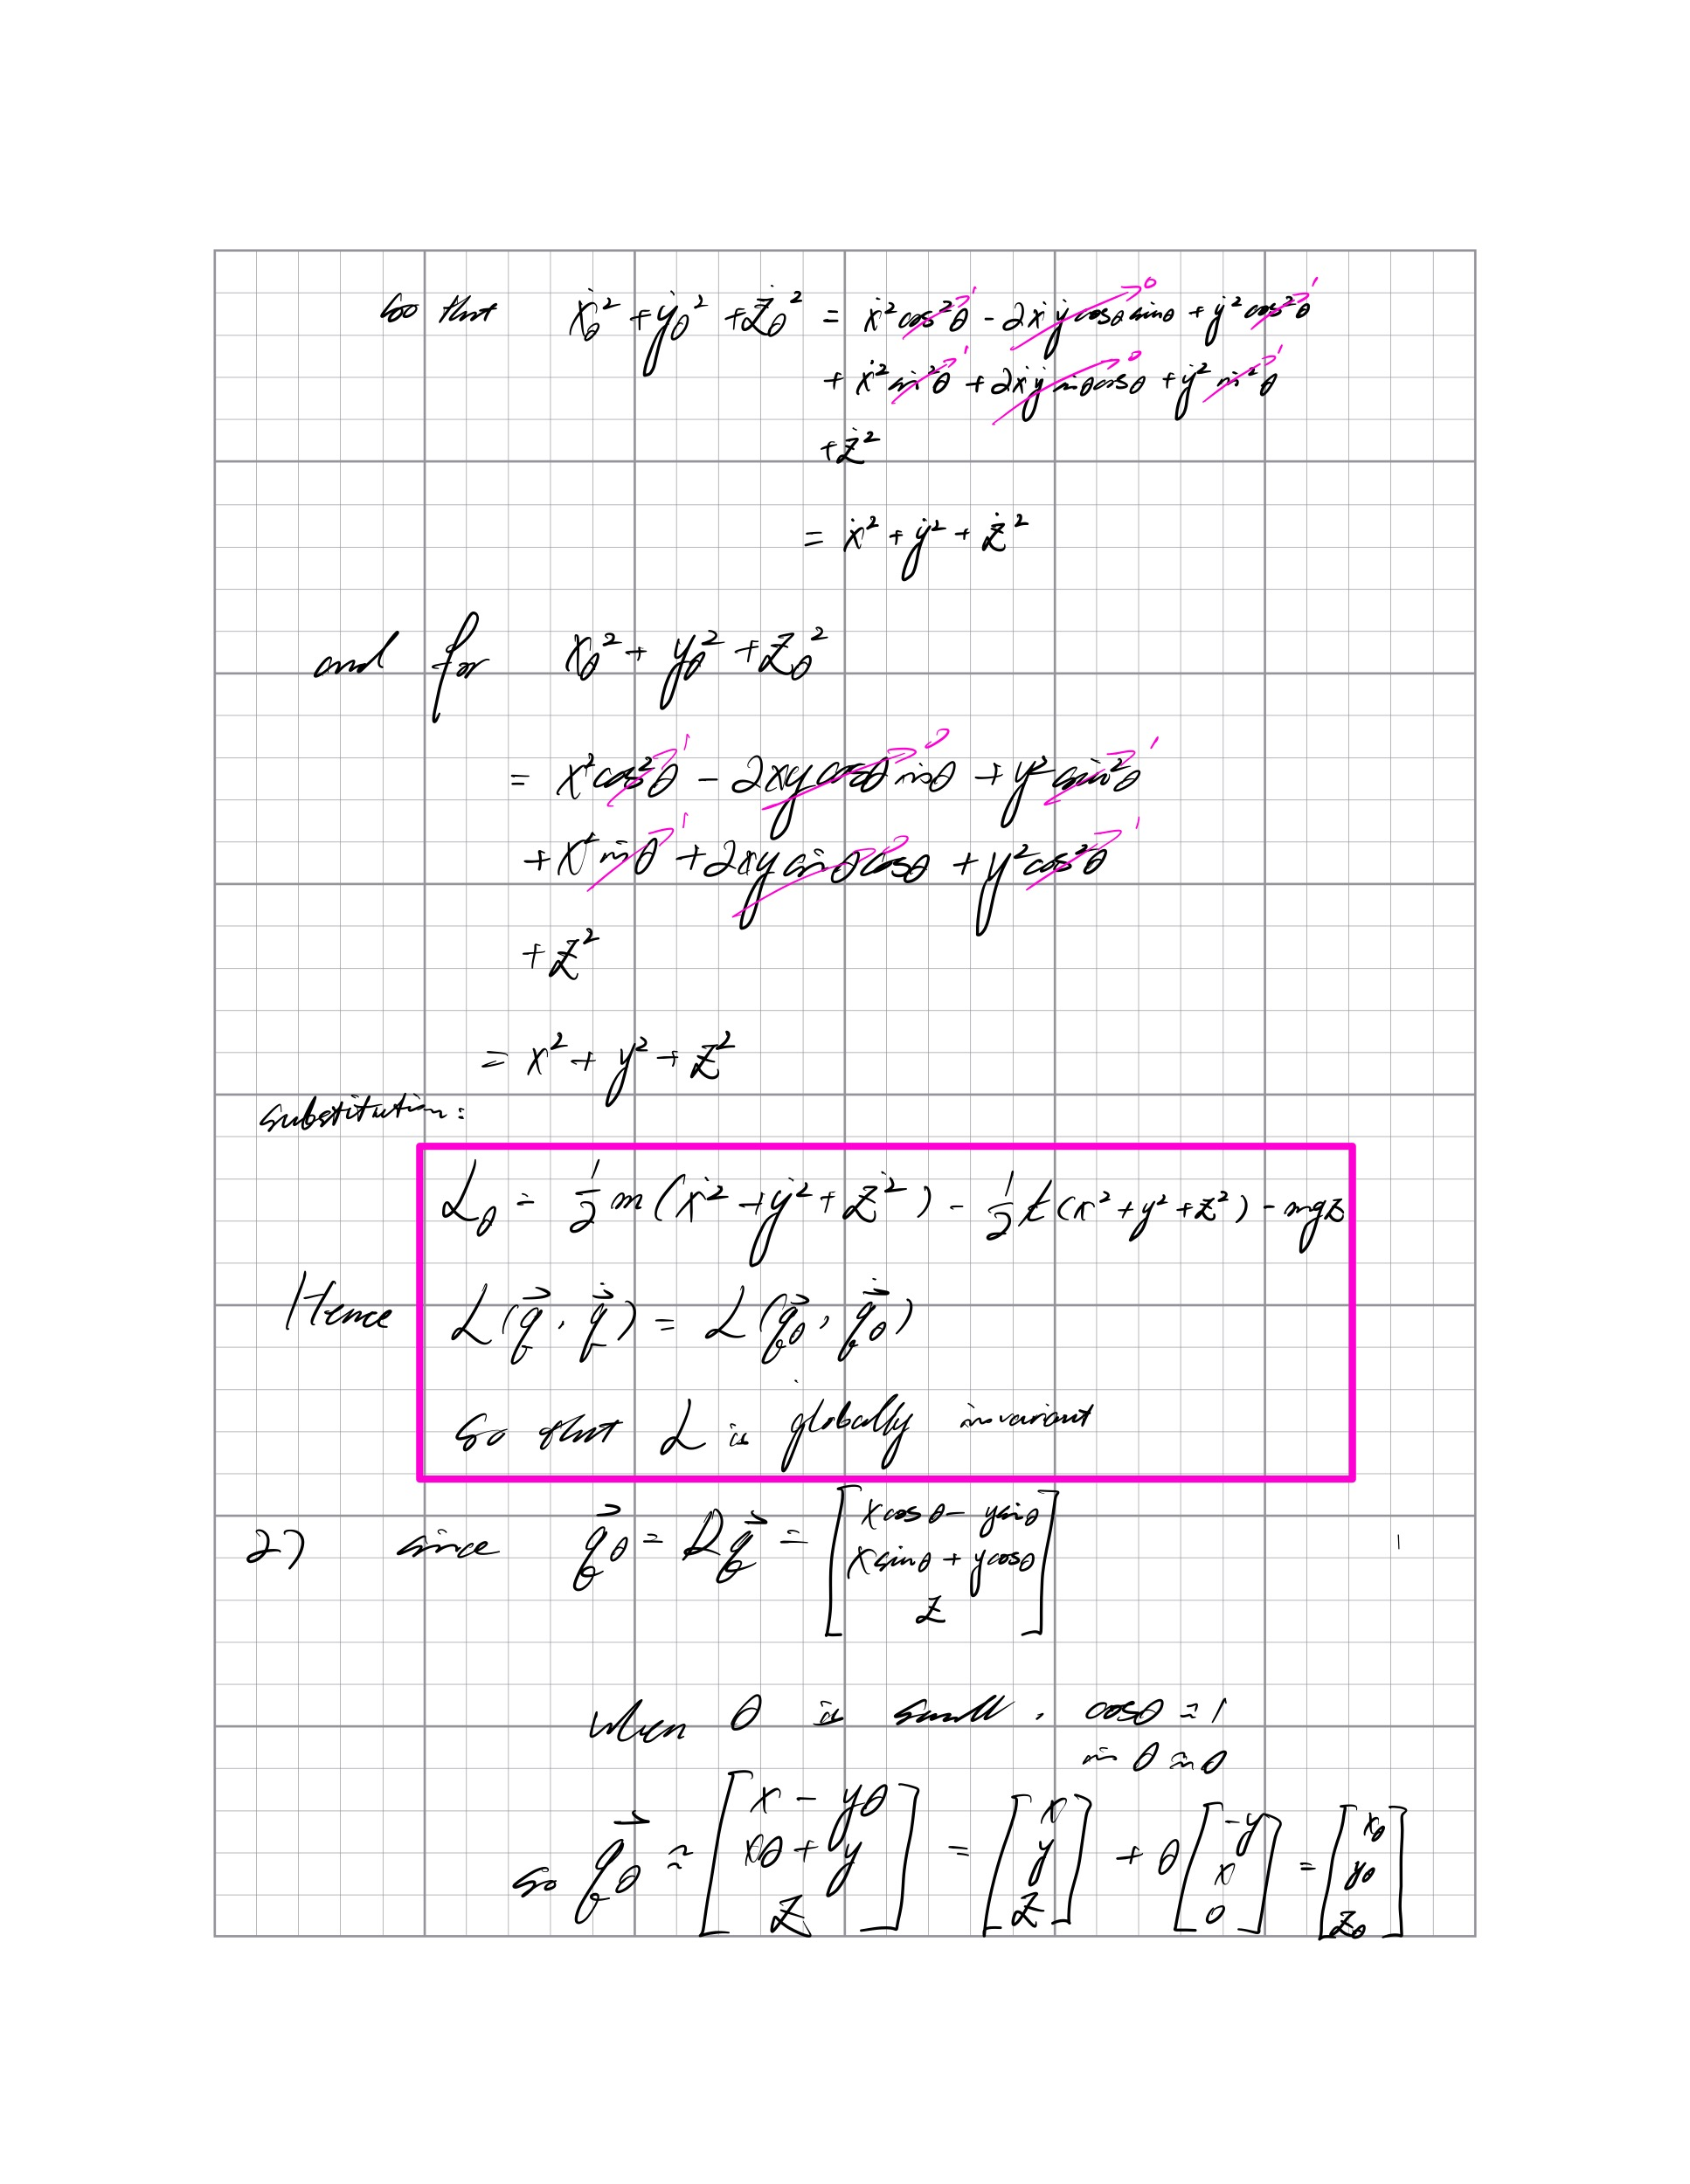

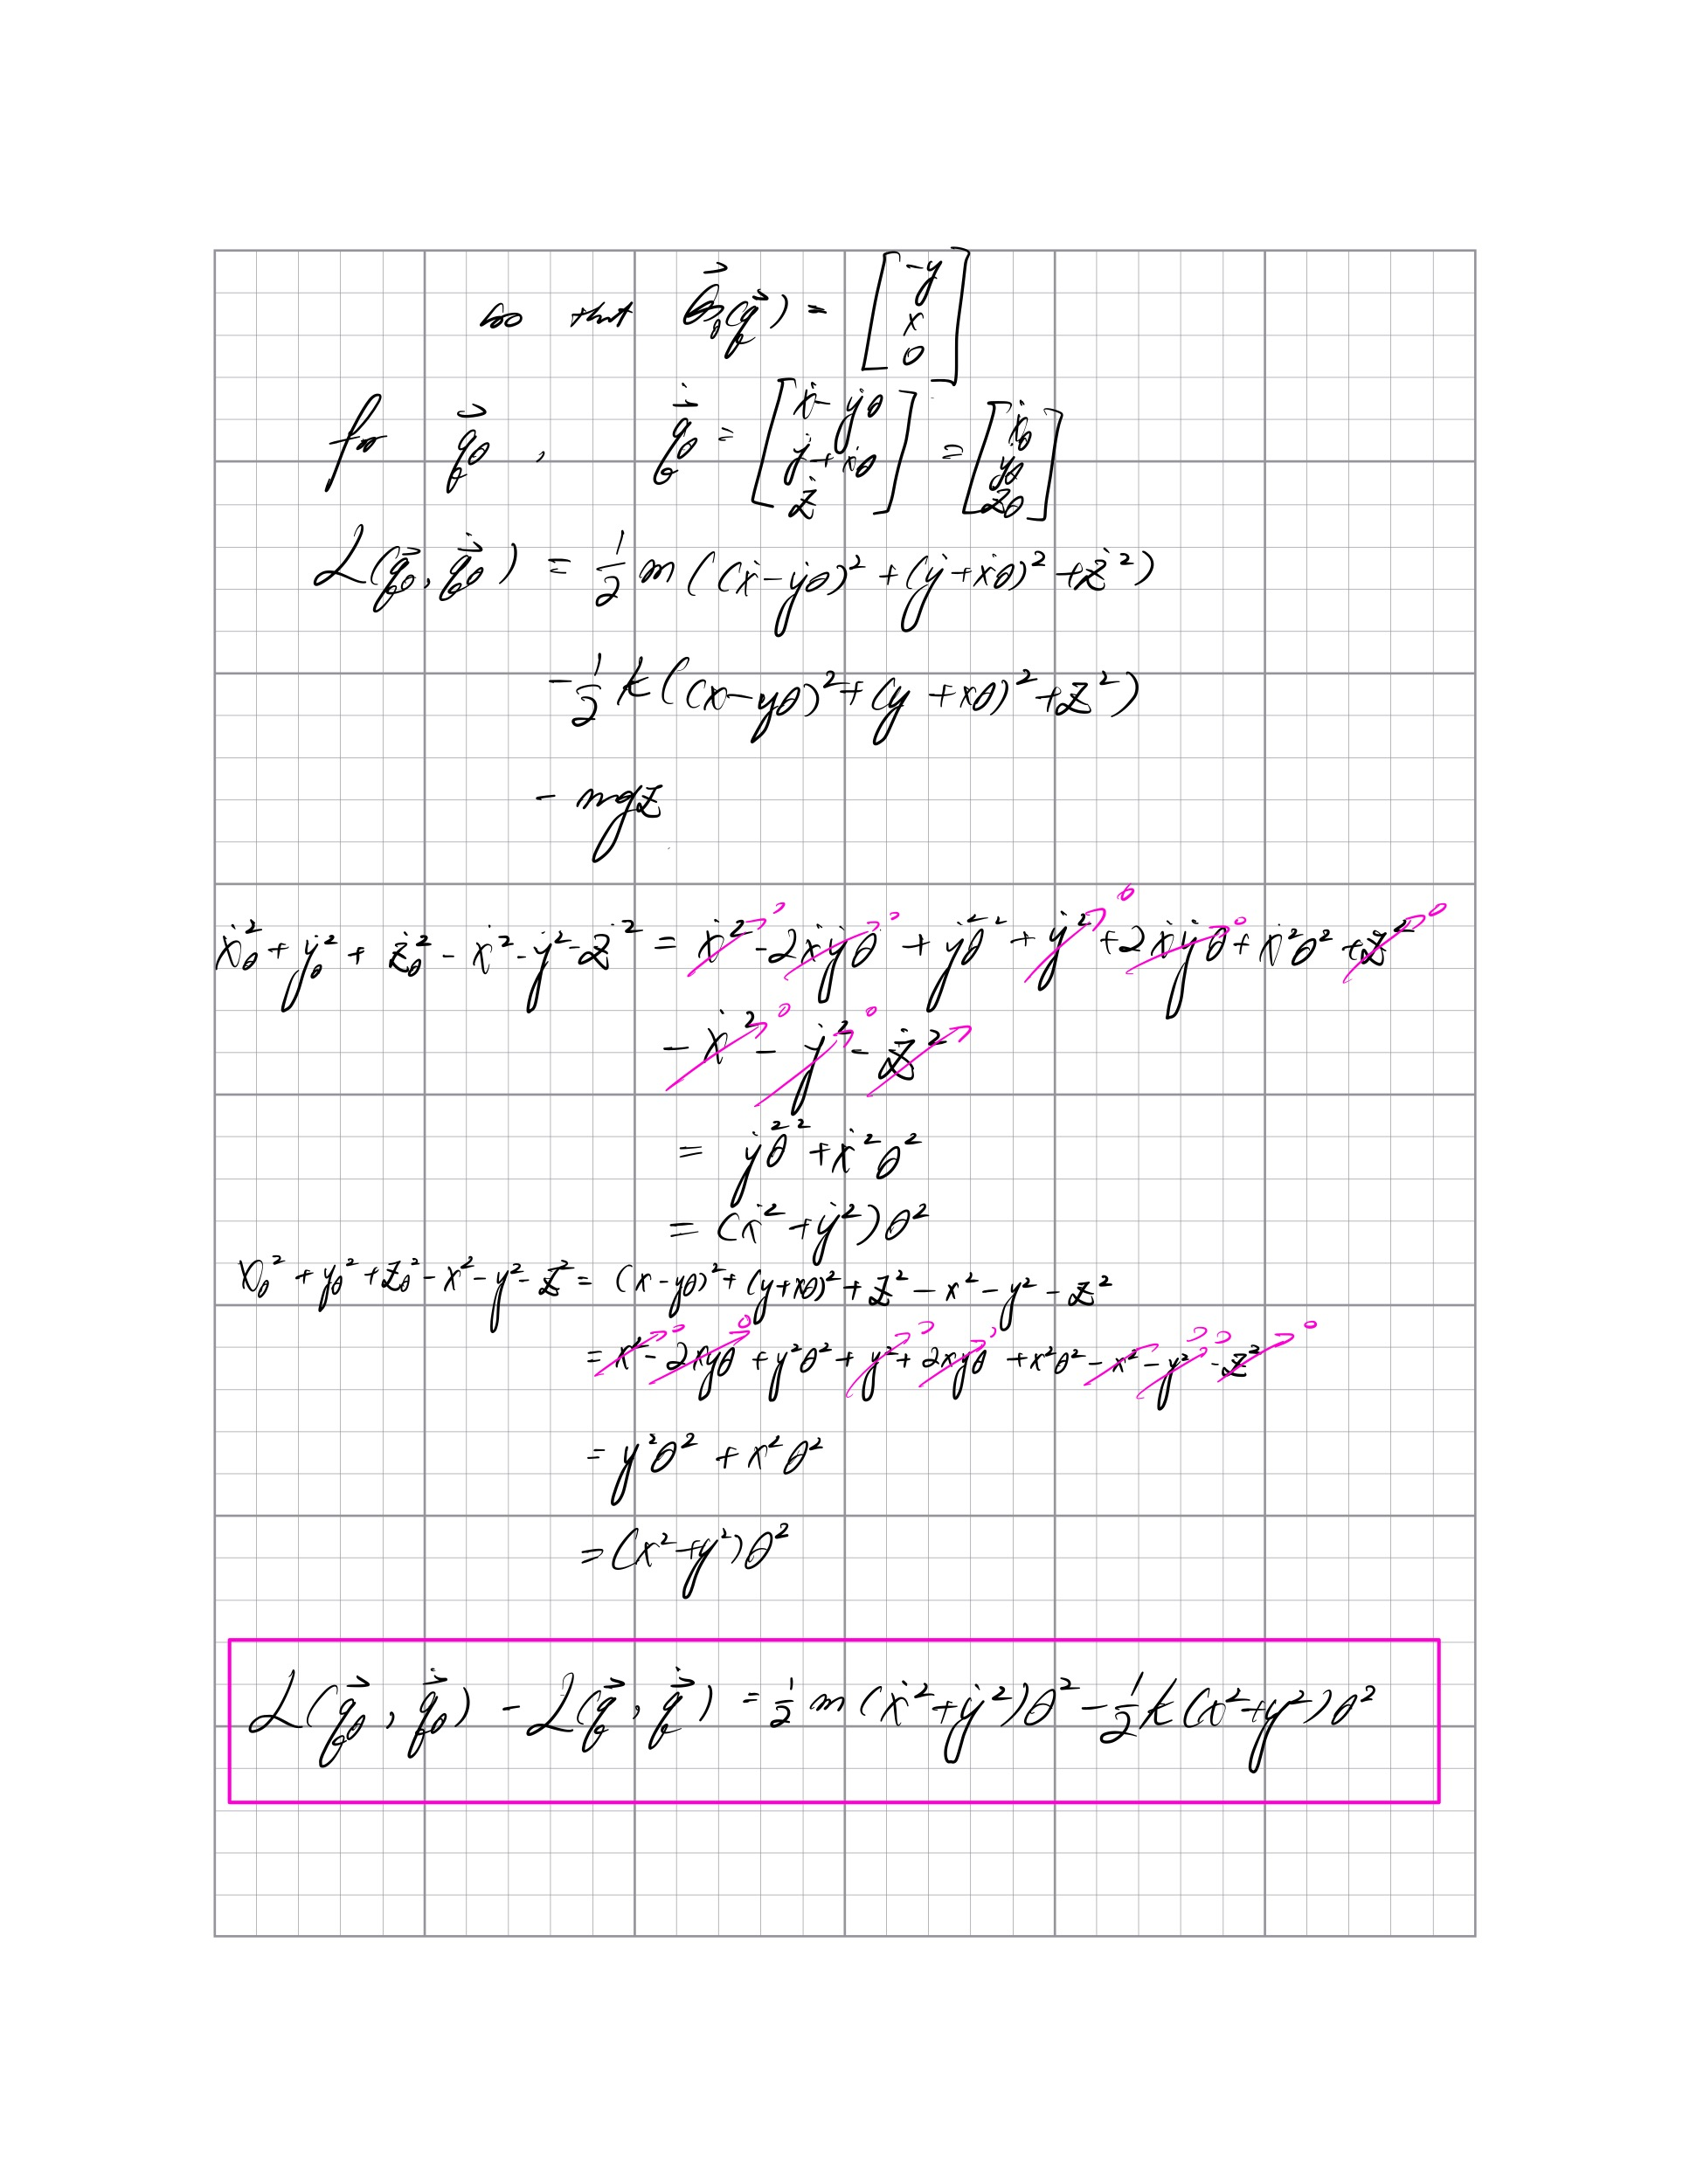

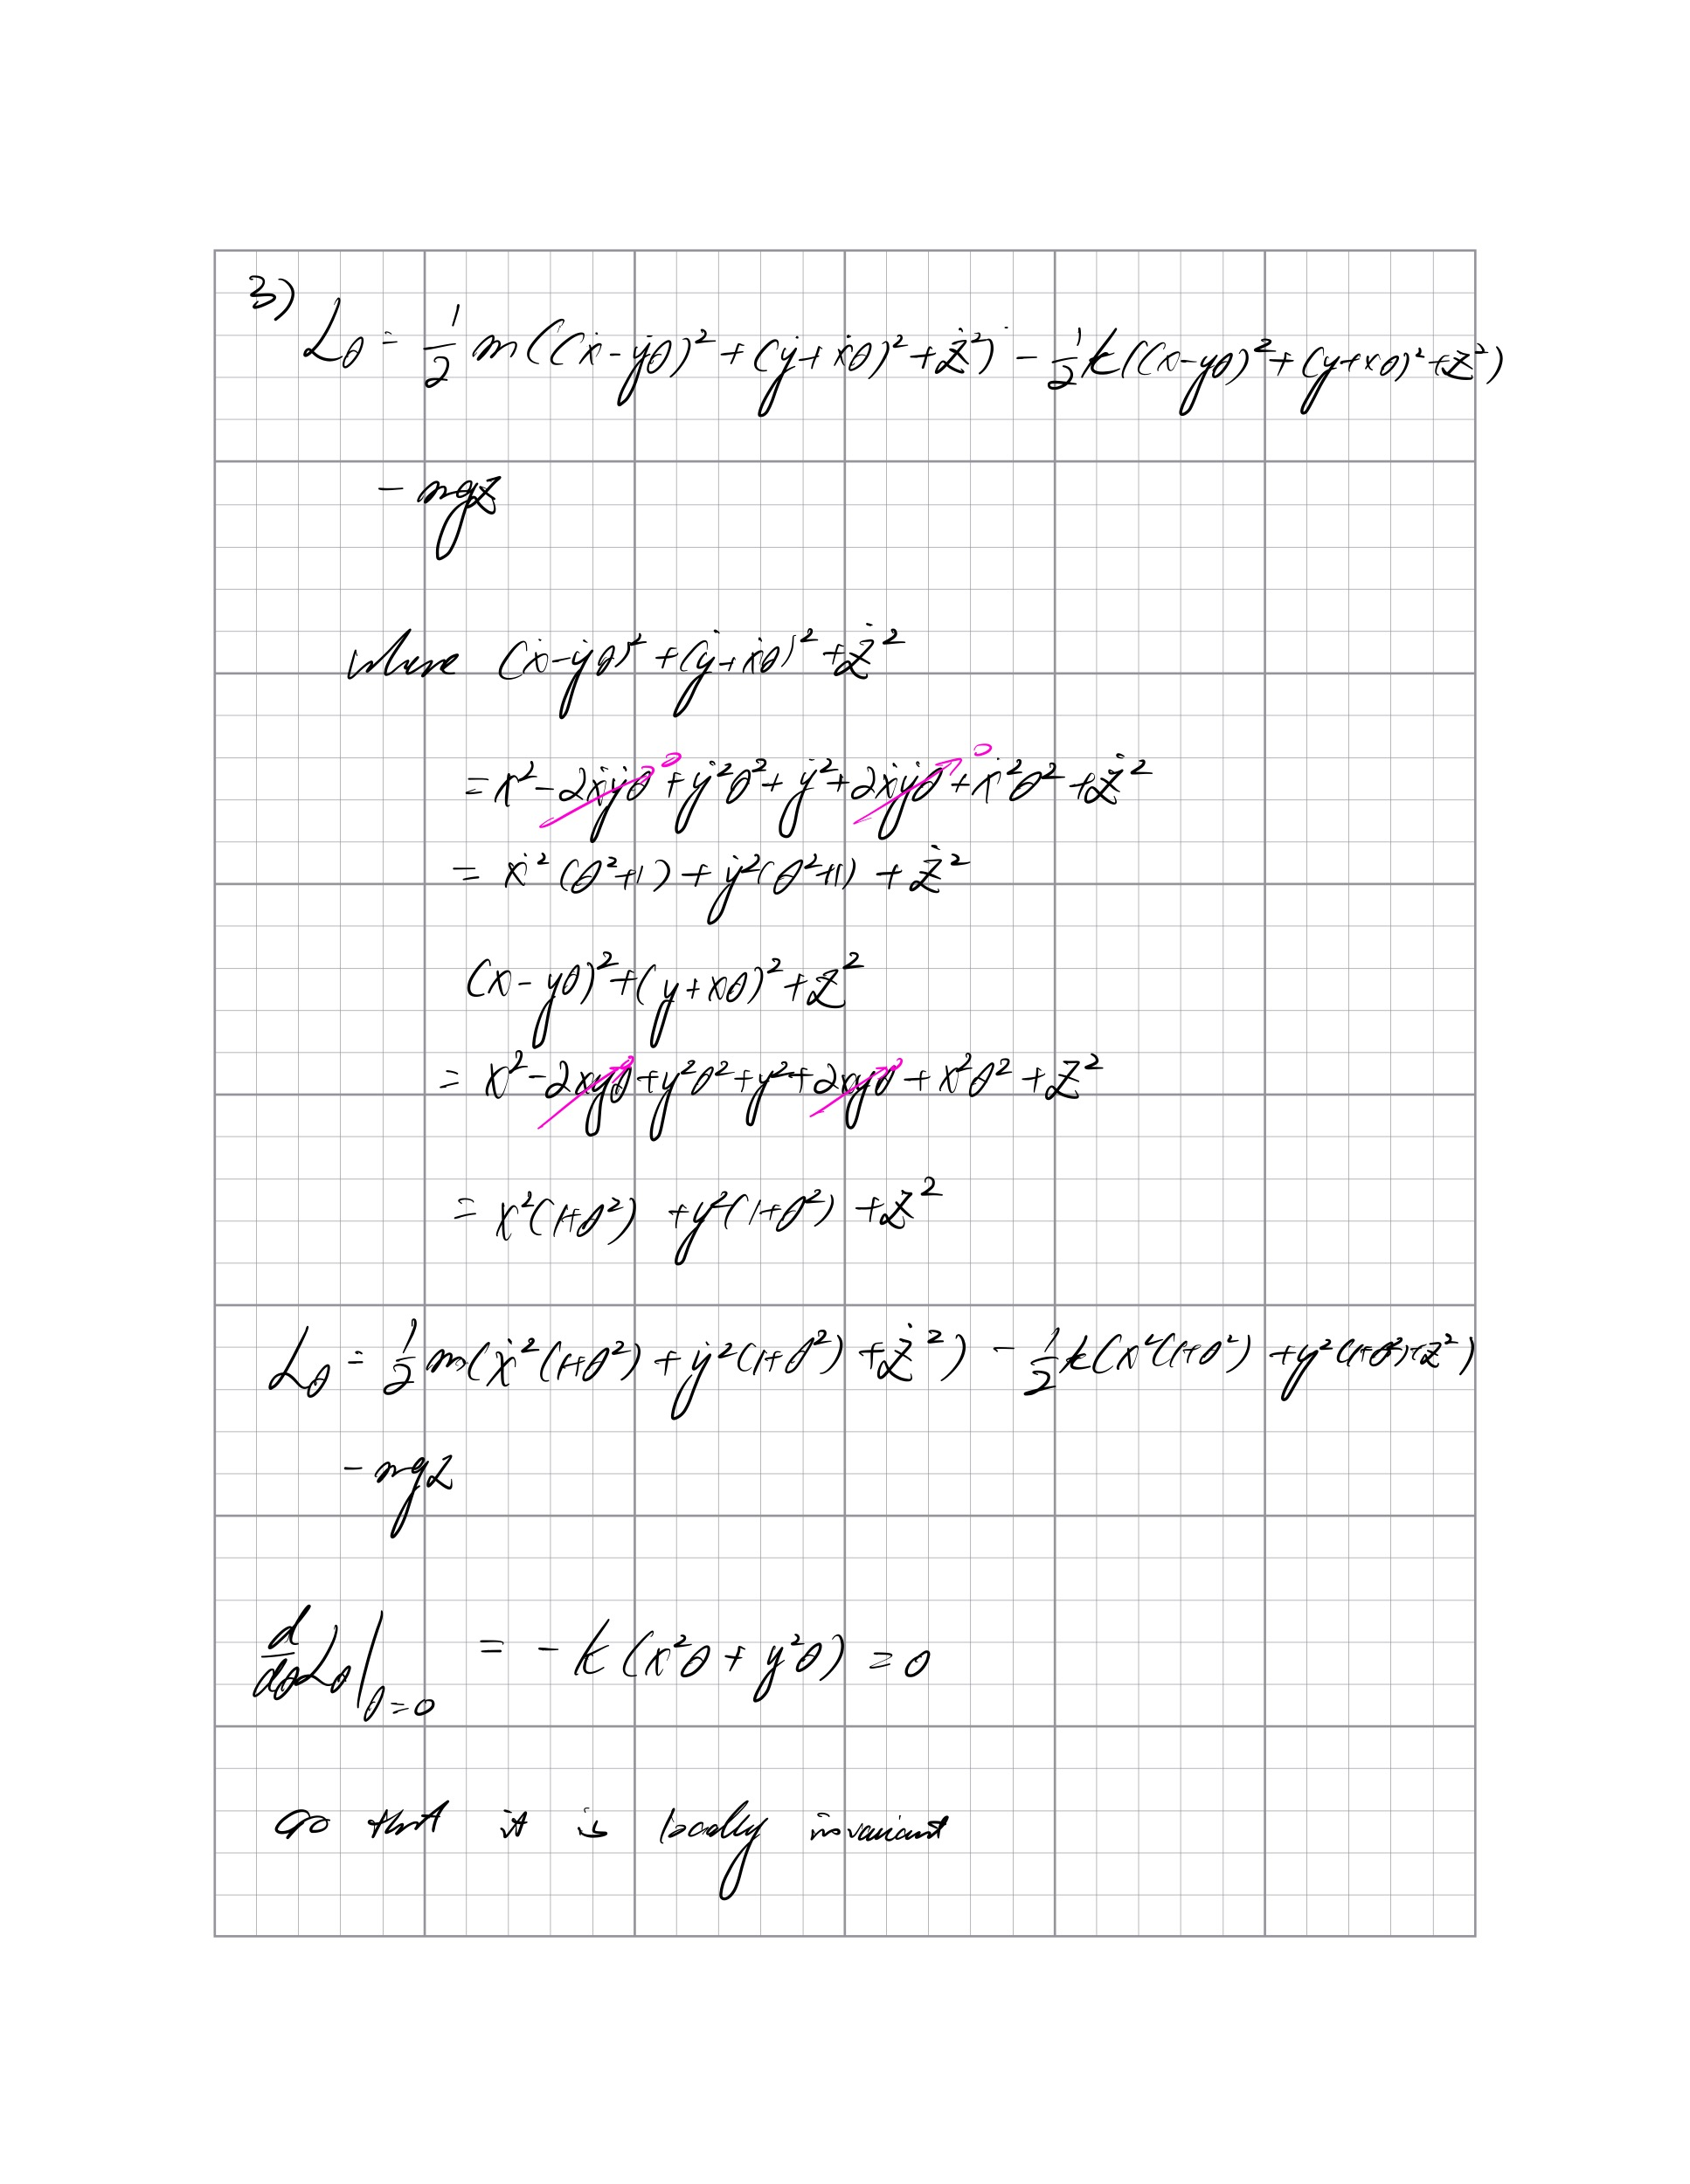

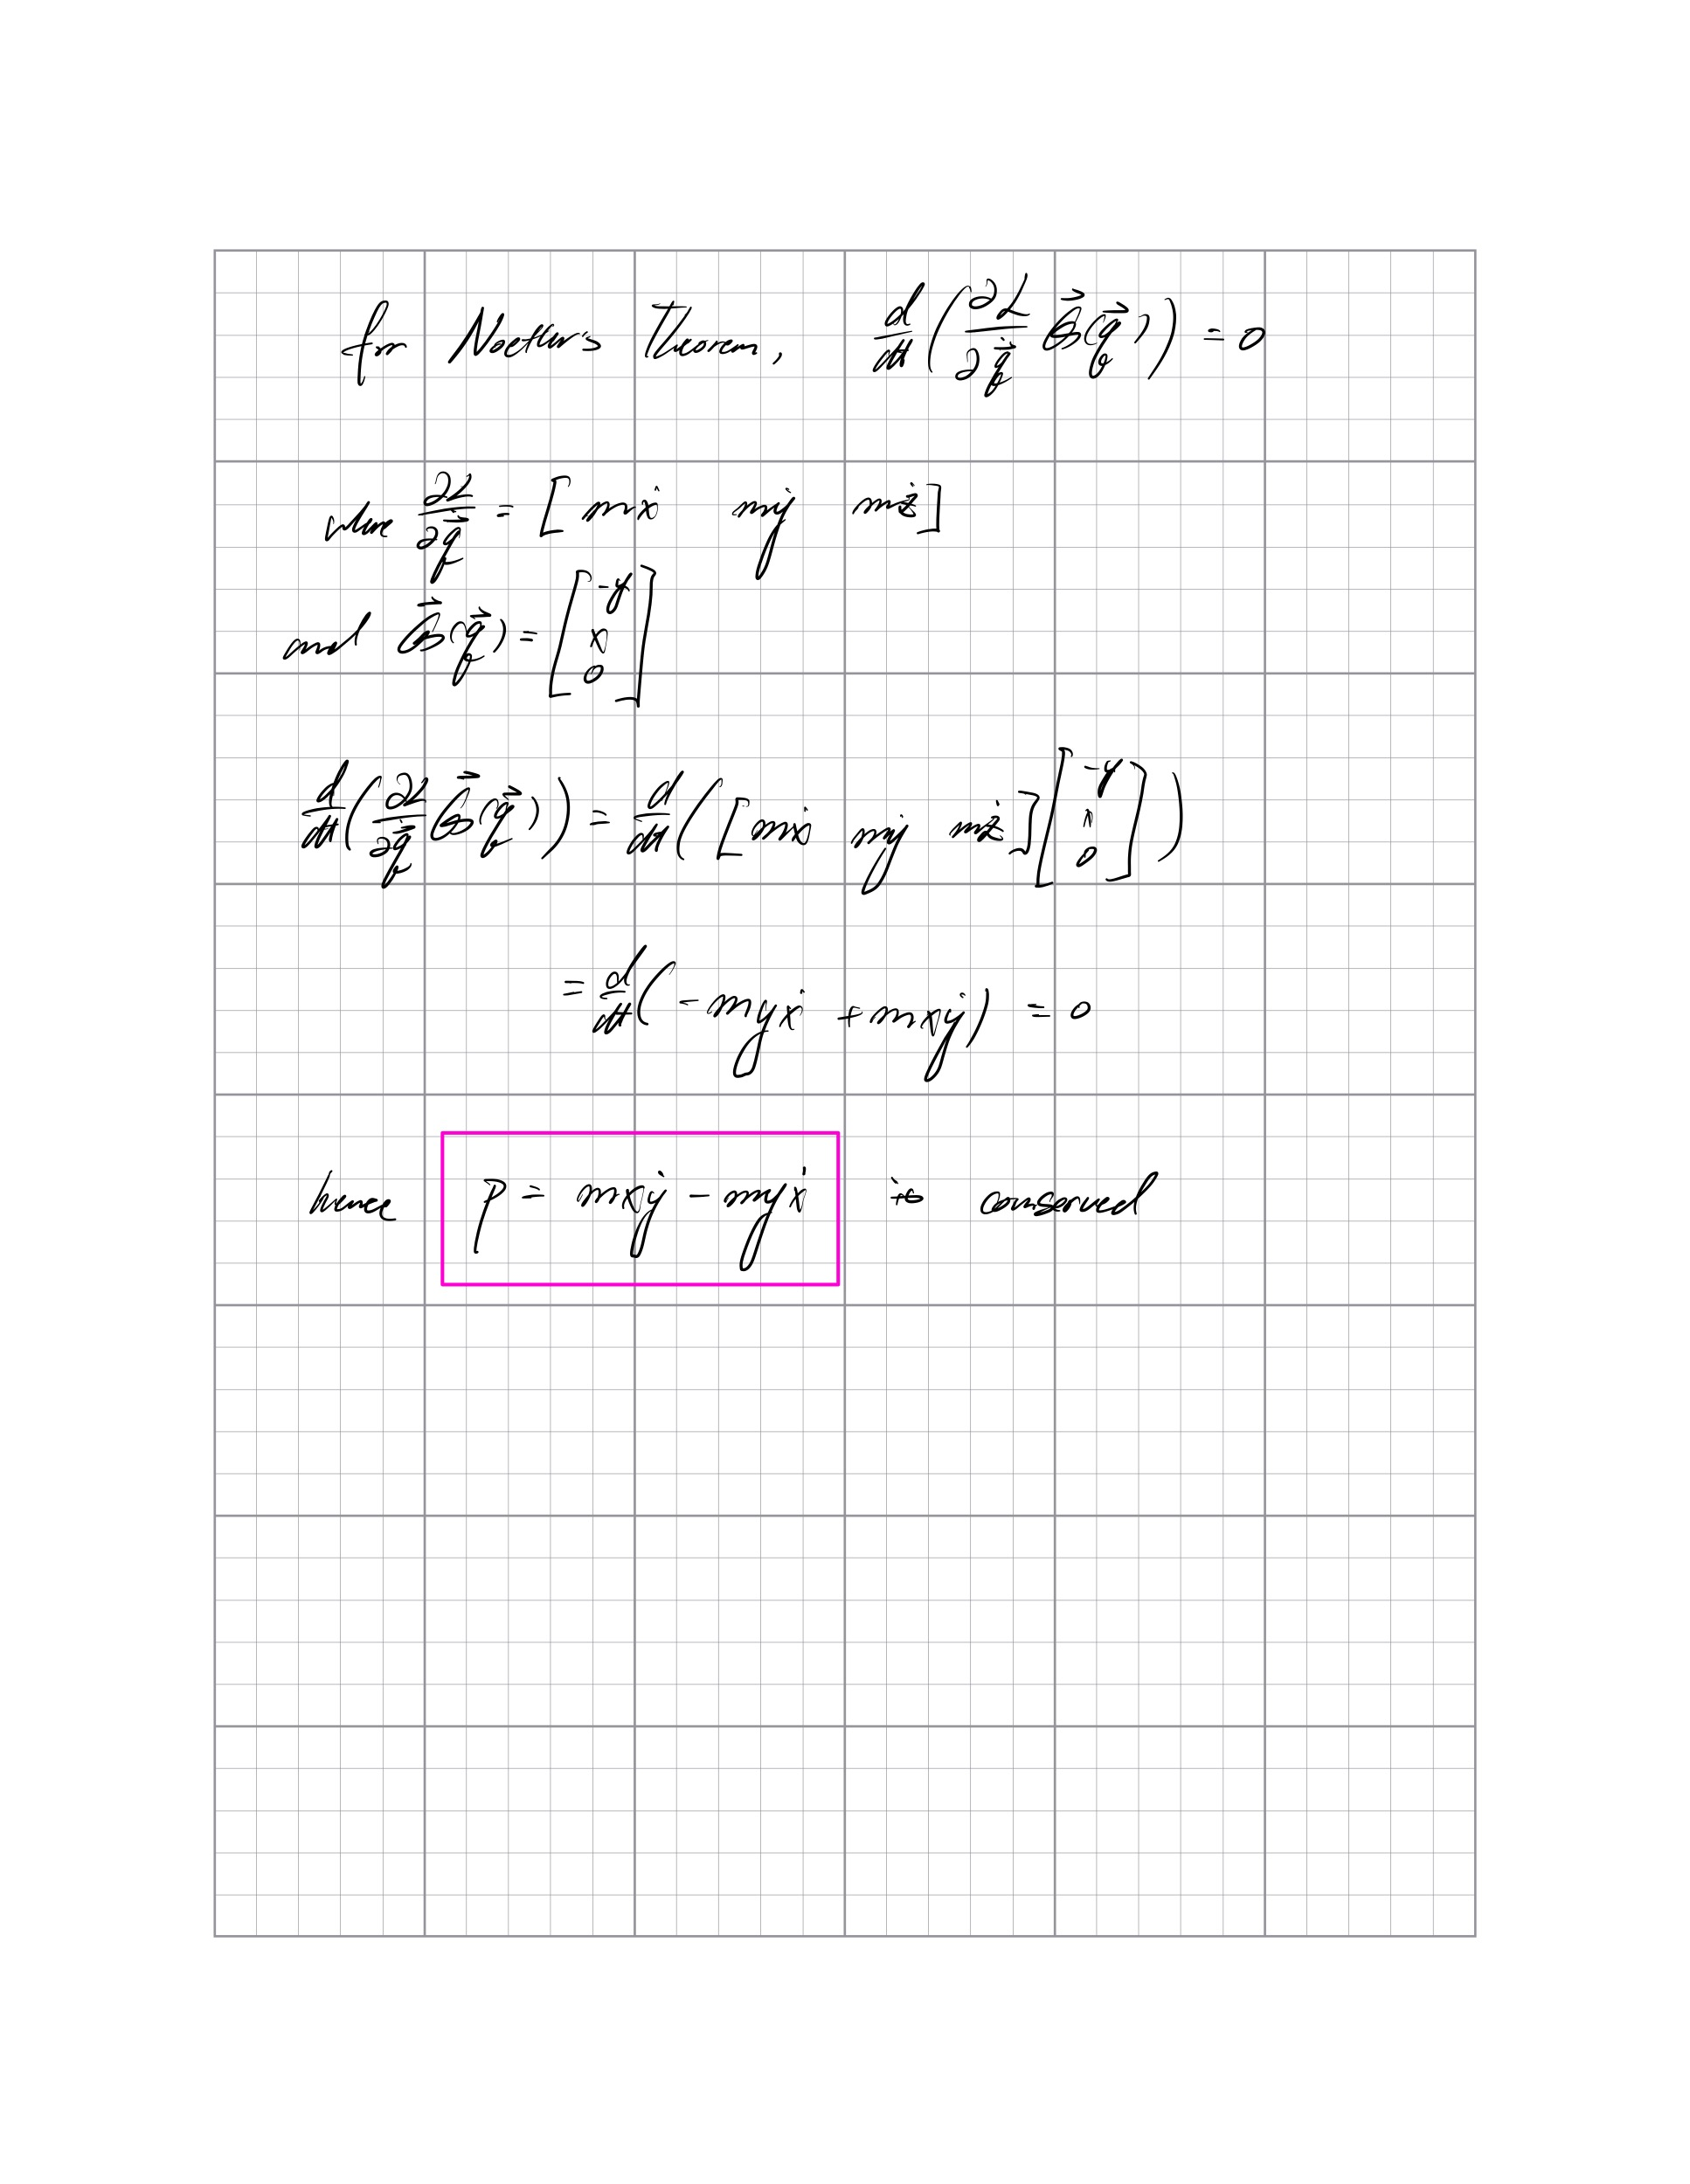

In [ ]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/atulletaylor/ME314Figures/raw/main/hw4problem3.png' width='600' height='350'></td></tr></table>"))

""


## Problem 3 (20pts)

For the inverted cart-pendulum system in Homework 1 (feel free to make use of the provided solutions), compute the conserved momentum using N&ouml;ther's theorem.  Plot the momentum for the same simulation parameters and initial conditions.  Taking into account the conserved quantities, what is the minimal number of *states* in the cart/pendulum system that can vary?  (Hint: In some coordinate systems it may *look* like all the states are varying, but if you choose your coordinates cleverly fewer states will vary.)

**Turn in: A copy of code used to calculate the conserved quantity and your answer to the question. You don't need to turn in equations of motion, but you need to include the plot of the conserved quantity evaluated along the system trajectory.**

In [ ]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/atulletaylor/ME314Figures/raw/main/hw4p4.png' width='600' height='350'></td></tr></table>"))

""


## Problem 4 (30 pts)
Using the same inverted cart pendulum system, add a constraint such that the pendulum follows the path of a parabola with a vertex of $(1,0)$.

Then, simulate the system using $x$ and $\theta$ as the configuration variables for $t\in[0,15]$ with $dt=0.01$. The constants are $M=2, m=1, R=1, g=9.8$. Use the initial conditions $x=0, \theta=0, \dot{x}=0, \dot{\theta}=0.01$ for your simulation.

You should use the Runge–Kutta integration function provided in previous homework for simulation. Plot the simulated trajectory for $x, \theta$ versus time. We have a provided an animation function for testing.

*Hint 1: You will need the time derivatives of $\phi$ to solve the system of equations.*

*Hint 2: Make sure to be solving for $\lambda$ at the same time as your equations of motion.*

*Hint 3: Note that if you make your initial condition velocities faster or dt lower resolution, you may not be able to simulate the system because this is challenging constraint.*

**Turn in: A copy of code used to simulate the system, you don't need to turn in equations of motion, but you need to include the plot of the simulated trajectories.**

In [ ]:
def animate_cart_pend(traj_array,R=1,T=15):
    """
    Function to generate web-based animation of double-pendulum system

    Parameters:
    ================================================
    traj_array:
        trajectory of theta and x, should be a NumPy array with
        shape of (2,N)
    R:
        length of the pendulum
    T:
        length/seconds of animation duration

    Returns: None
    """

    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go

    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)

    ###############################################
    # Getting data from pendulum angle trajectories.
    xcart=traj_array[0]
    ycart = 0.0*np.ones(traj_array[0].shape)
    N = len(traj_array[1])

    xx1=xcart+R*np.sin(traj_array[1])
    yy1=R*np.cos(traj_array[1])

     # Need this for specifying length of simulation

    ####################################
    # Using these to specify axis limits.
    xm=-4
    xM= 4
    ym=-4
    yM= 4

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[
          dict(x=xcart, y=ycart,
               mode='markers', name='Cart Traj',
               marker=dict(color="green", size=2)
              ),
          dict(x=xx1, y=yy1,
               mode='lines', name='Arm',
               line=dict(width=2, color='blue')
              ),
           dict(x=xx1, y=yy1,
               mode='lines', name='Pendulum',
               line=dict(width=2, color='purple')
              ),

           dict(x=xx1, y=yy1,
               mode='markers', name='Pendulum Traj',
               marker=dict(color="purple", size=2)
              ),
        ]

    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Cart Pendulum Simulation',
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )

    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
    frames=[dict(data=[go.Scatter(
                            x=[xcart[k]],
                            y=[ycart[k]],
                            mode="markers",
                            marker_symbol="square",
                            marker=dict(color="blue", size=30)),

                       dict(x=[xx1[k],xcart[k]],
                            y=[yy1[k],ycart[k]],
                            mode='lines',
                            line=dict(color='red', width=3)
                            ),
                       go.Scatter(
                            x=[xx1[k]],
                            y=[yy1[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),

                      ]) for k in range(N)]

    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)
    iplot(figure1)